In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
df_googleplaystore = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))



In [ ]:
# df_googleplaystore_user_reviews = pd.read_csv(io.BytesIO(uploaded['googleplaystore_user_reviews.csv']))
# print(df_googleplaystore_user_reviews.head())

In [ ]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_googleplaystore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# converts k to 000 and M to 000000, and remove decimal points in 'Size' column
size_of_apps = list(df_googleplaystore['Size'])
size_of_apps_1 = []

for i in size_of_apps:
    if 'k' in i:
        i = i.replace('k', '000')
        size_of_apps_1.append(i)
    elif 'M' in i:
        i = i.replace('M', '000000')
        i = i.replace('.', '')
        size_of_apps_1.append(i)
    else:
        size_of_apps_1.append(i)

df_googleplaystore["Size"] = size_of_apps_1

# drops 'Size' columns with 'Varies with device' as value

df_googleplaystore = df_googleplaystore[~df_googleplaystore.Size.str.contains("Varies with device")]




In [ ]:
# drop NaN/ null values in all columns
df_googleplaystore = df_googleplaystore.dropna()

# drops the $ in front of all the prices
df_googleplaystore['Price'] = df_googleplaystore['Price'].map(lambda x: x.lstrip('$'))

# drops random record which has a string value in 'Review' column
df_googleplaystore[df_googleplaystore['Reviews'] == '3.0M']
# df_googleplaystore.drop(axis = 0, index = 10472, inplace = True)

# convert reviews column datatype from object to float
df_googleplaystore[['Reviews']] = df_googleplaystore[['Reviews']].astype(float)
df_googleplaystore[['Price']] = df_googleplaystore[['Price']].astype(float)
df_googleplaystore[['Size']] = df_googleplaystore[['Size']].astype(float)

print(df_googleplaystore)

df_googleplaystore.describe()



                                                     App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10833                                        Chemin (fr)  ...          2.2 and up
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[7723 rows x 13

Rating       Reviews          Size        Price
count  7723.000000  7.723000e+03  7.723000e+03  7723.000000
mean      4.173935  2.948983e+05  3.978180e+07     1.128169
std       0.544638  1.863933e+06  2.518828e+07    17.408036
min       1.000000  1.000000e+00  8.500000e+00     0.000000
25%       4.000000  1.075000e+02  2.000000e+07     0.000000
50%       4.300000  2.332000e+03  3.400000e+07     0.000000
75%       4.500000  3.905300e+04  5.650000e+07     0.000000
max       5.000000  4.489389e+07  1.000000e+08   400.000000

In [ ]:
print(df_googleplaystore.dtypes)

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
df_googleplaystore

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10833                                        Chemin (fr)  ...          2.2 and up
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[7723 rows x 13 columns]

In [ ]:
df_googleplaystore["Installs"].value_counts()

1,000,000+        1301
100,000+          1037
10,000+            968
10,000,000+        825
1,000+             689
5,000,000+         535
500,000+           490
50,000+            436
5,000+             419
100+               303
100,000,000+       201
500+               197
50,000,000+        147
10+                 67
50+                 56
500,000,000+        30
1,000,000,000+      10
5+                   9
1+                   3
Name: Installs, dtype: int64

In [ ]:
installs_of_apps = list(df_googleplaystore['Installs'])
installs_of_apps_1 = []
def encode(xxx):
    if xxx == "1+" or xxx=="10+" or xxx=="50+" or xxx=="5+": 
        return 1
    elif xxx == "100+" or xxx=="5,000+" or xxx=="1,000+" or xxx=="500+":
        return 2
    elif xxx == "10,000+" or xxx=="50,000+" or xxx=="100,000+" or xxx=="500,000+":
        return 3
    elif xxx == "1,000,000+" or xxx=="5,000,000+" or xxx=="10,000,000+" or xxx=="50,000,000+":
        return 4
    elif xxx == "100,000,000+" or xxx=="500,000,000+" or xxx=="1,000,000,000+":
        return 5

In [ ]:
df_googleplaystore["InstallsNEW"] = df_googleplaystore["Installs"].apply(encode)
df_googleplaystore["InstallsNEW"].value_counts()

3    2931
4    2808
2    1608
5     241
1     135
Name: InstallsNEW, dtype: int64

In [ ]:
df_googleplaystore["Score_1"] = df_googleplaystore["InstallsNEW"] + df_googleplaystore["Rating"]
df_googleplaystore = df_googleplaystore.sort_values(by = "Score_1")

In [ ]:
df_googleplaystore.tail()

App Category  ...  InstallsNEW  Score_1
1906        Talking Tom Gold Run     GAME  ...            5      9.6
1902    Dream League Soccer 2018     GAME  ...            5      9.6
4566  SHAREit - Transfer & Share    TOOLS  ...            5      9.6
1843               Angry Birds 2     GAME  ...            5      9.6
3987                Clash Royale   FAMILY  ...            5      9.6

[5 rows x 15 columns]

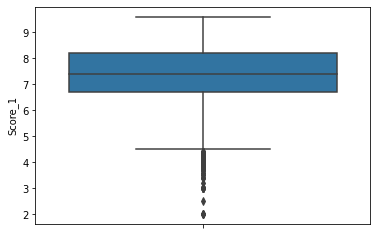

In [ ]:
sns.boxplot(y= "Score_1", data = df_googleplaystore)

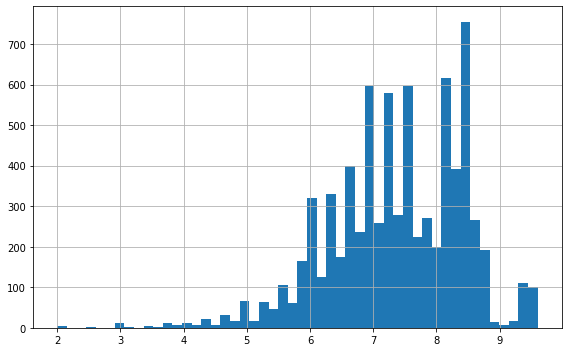

In [ ]:
df_googleplaystore["Score_1"].hist(figsize = (8,5),bins=50)
plt.tight_layout()
plt.show()

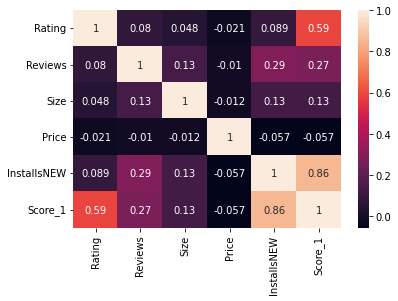

In [ ]:
sns.heatmap(df_googleplaystore.corr(), annot = True)

In [ ]:
df_googleplaystore.skew()

Rating         -1.750651
Reviews        13.631838
Size            0.678742
Price          22.169177
InstallsNEW    -0.227916
Score_1        -0.642125
dtype: float64

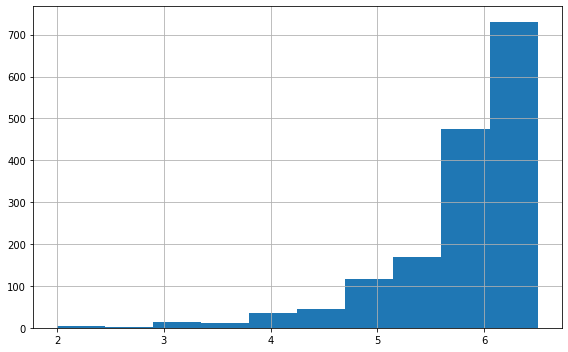

In [ ]:
bad_apps = df_googleplaystore.head(1600)
# bad_apps["Score_1"].count()

bad_apps["Score_1"].hist(figsize = (8,5),bins=10)
plt.tight_layout()
plt.show()


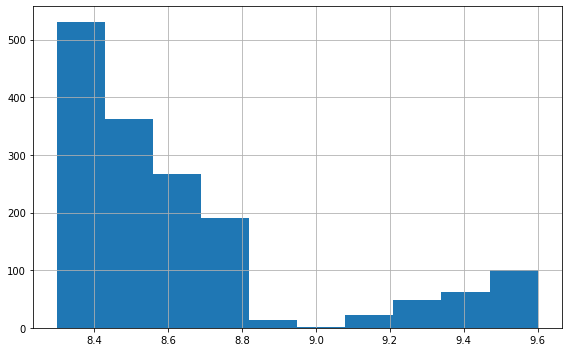

In [ ]:
good_apps = df_googleplaystore.tail(1600)
# good_apps["Score_1"].count()

good_apps["Score_1"].hist(figsize = (8,5),bins=10)
plt.tight_layout()
plt.show()

In [ ]:
df_googleplaystore

App  ... Score_1
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...     7.1
1                                    Coloring book moana  ...     6.9
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...     8.7
3                                  Sketch - Draw & Paint  ...     8.5
4                  Pixel Draw - Number Art Coloring Book  ...     7.3
...                                                  ...  ...     ...
10833                                        Chemin (fr)  ...     6.8
10834                                      FR Calculator  ...     6.0
10836                                   Sya9a Maroc - FR  ...     6.5
10837                   Fr. Mike Schmitz Audio Teachings  ...     7.0
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...     8.5

[7723 rows x 15 columns]

In [ ]:
df_googleplaystore['Genres'].value_counts()

Tools                                    633
Entertainment                            448
Education                                417
Medical                                  324
Action                                   322
                                        ... 
Adventure;Brain Games                      1
Music & Audio;Music & Video                1
Puzzle;Education                           1
Health & Fitness;Education                 1
Video Players & Editors;Music & Video      1
Name: Genres, Length: 112, dtype: int64

# WordCloud

In [ ]:
import re 
import string
import nltk
import numpy as np
# nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
    ) 
    text = re.sub('app','', text)
    text = text.lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(EMOJI_PATTERN, '', text)
    text = re.sub('([^\x00-\x7F])+','',text)
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

In [ ]:
def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

def clean_text_round3_lemmatize(text):
    
    tokenization = nltk.word_tokenize(text)
    lemmtized_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in tokenization])
    return lemmtized_text

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text_joined = " ".join(one_row for one_row in df_clean['Original Review'])

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)

# Display the generated image:
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()